In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import json
import seaborn as sns

In [4]:
# sns.set_style('ticks')
# sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.75, rc={'lines.linewidth': 2})

In [89]:
# lookup:        0.038 | DNS lookup
# connect:       0.063 | http connect
# appconnect:    0.177 | ssl connect
# pretransfer:   0.178 | wait
# redirect:      0.225
# starttransfer: 0.679 | time to first byte
# total:         0.929 | total download time

def find_delays(o):
    ret_object = {
        'www': o['url'],
        'time_DNS': None,
        'time_HTTP': None,
        'time_SSL': None,
        'time_Redirect': None,
        'time_Wait': None,
        'time_FirstByte': None,
        'time_Download': None,
    }
    ret_object['time_DNS'] = o['time_namelookup']
    t = o['time_namelookup']

    if o['time_connect'] > 0:
        ret_object['time_HTTP'] = o['time_connect'] - t
        t = o['time_connect']
    
    if o['time_appconnect'] > 0:
        ret_object['time_SSL'] = o['time_appconnect'] - t
        t = o['time_appconnect']
        
#     if o['time_pretransfer'] > 0:
#         ret_object['time_Wait'] = o['time_pretransfer'] - t
#         t = o['time_pretransfer']
    
#     if o['time_redirect'] > 0:
#         ret_object['time_Redirect'] = o['time_redirect'] - t
#         t = o['time_redirect']
    
    if o['time_starttransfer'] > 0:
        ret_object['time_Wait'] = o['time_starttransfer'] - t
        t = o['time_starttransfer']        
    
    if o['time_starttransfer'] > 0:
        ret_object['time_FirstByte'] = o['time_starttransfer']
        t = o['time_starttransfer']        
    
    if o['time_total'] > 0:
        ret_object['time_Download'] = o['time_total'] - t
    
    return ret_object

def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

In [90]:
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/Timings/alexa_times.txt'
data = [find_delays(json.loads(l)) for l in open(fn, 'rb')]

In [91]:
df_time = DataFrame(data)
# df = df.set_index(['url'])

In [92]:
df_time.head()

,time_DNS,time_Download,time_FirstByte,time_HTTP,time_Redirect,time_SSL,time_Wait,www
0,0.004,0.001,0.046,0.008,None,NaN,0.034,google.com
1,0.029,0.018,0.079,0.006,None,NaN,0.044,bing.com
2,0.016,0.029,0.075,0.029,None,NaN,0.030,apple.com
3,0.127,0.001,0.166,0.007,None,NaN,0.032,google.com.br
4,0.124,0.001,0.165,0.008,None,NaN,0.033,google.com.mx


In [93]:
fn = '/home/motamedi/Dropbox/workspace/PycharmProjects/charm/WWWPerf/data/top_site_cdn_max.csv'
df_www_cdn = pd.read_csv(fn)
df_www_cdn.head()

,cdn,www,size
0,Google,39.net,27615
1,Google,4shared.com,368450
2,Google,addthis.com,86291
3,Google,adexc.net,88149
4,Google,adf.ly,167144


In [94]:
df = pd.merge(df_time, df_www_cdn, on='www')
df_avg = df.groupby('cdn').mean()
df_avg

,time_DNS,time_Download,time_FirstByte,time_HTTP,time_SSL,time_Wait,size
cdn,,,,,,,
Akamai,0.932071,2.629339,1.506429,0.144684,0.393250,0.332738,780672.354331
Amazon Cloudfront,0.675643,7.999321,1.386889,0.212185,0.544500,0.232037,1348872.821429
CDNetworks,0.883167,1.072500,1.275000,0.260833,NaN,0.131000,836515.833333
ChinaCache,1.593667,1.446222,2.093222,0.169778,NaN,0.329778,357620.555556
ChinaNetCenter,1.510000,1.886000,1.733000,0.017000,NaN,0.206000,330072.000000
EdgeCast,0.944750,2.984875,1.982375,0.318071,1.084667,0.352563,480150.000000
Fastly,0.690000,1.844450,1.208050,0.054278,0.219444,0.370450,847187.900000
Google,0.935127,2.369239,1.410482,0.164647,0.550568,0.213152,308099.182741
Highwinds,0.446000,0.984750,3.458000,0.355250,NaN,2.656750,477027.750000


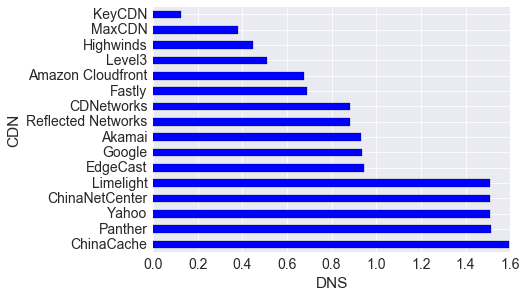

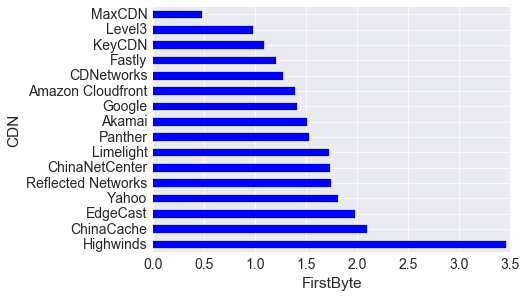

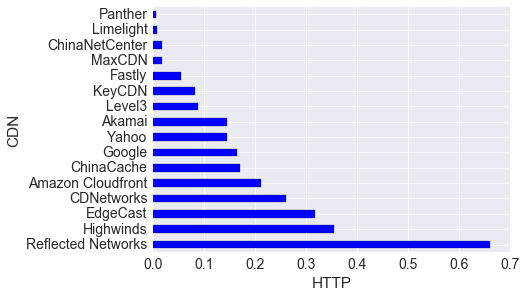

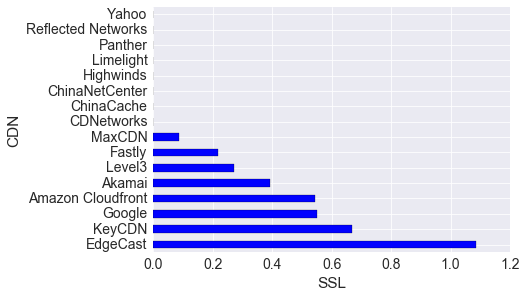

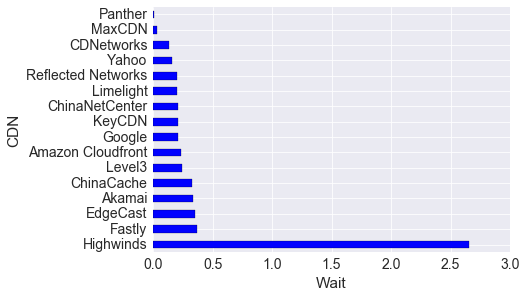

In [95]:
interests = ['time_DNS', 'time_FirstByte', 'time_HTTP', 'time_SSL', 'time_Wait']
for el in interests:
    plt.figure()
    df_avg.sort_values([el], ascending=[False])[el].plot(kind='barh')
    plt.xlabel(el.replace('time_',''))
    plt.ylabel('CDN')
    fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/pdf/{0}.pdf'.format(el)
    plt.savefig(fig_name, bbox_inches='tight', format='pdf', dpi=320)

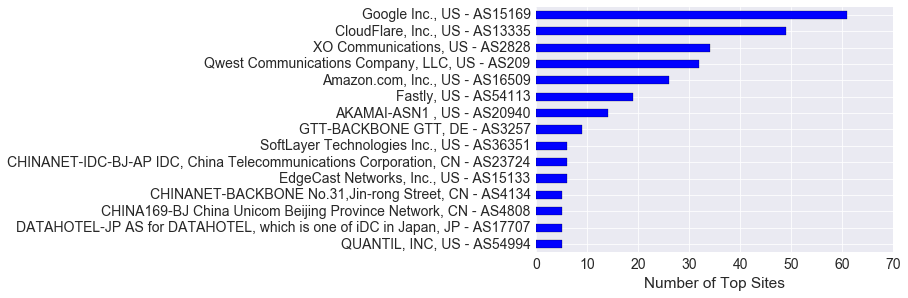

In [85]:
net_names = df_merge.apply(lambda r: '{} - AS{}'.format(r['name'].split(' - ')[-1], r['asn']), axis=1)
# net_names = df_merge.apply(lambda r: '{} - AS{}'.format(r['name'], r['asn']), axis=1)
ax = net_names.value_counts(ascending=True).tail(n=15).plot(kind='barh')
ax.grid('on')
ax.set_xlabel('Number of Top Sites')
fig_name = '/home/motamedi/Dropbox/Apps/ShareLaTeX/ThousandEyes/figs/net_usage.pdf'
plt.savefig(fig_name, bbox_inches='tight', format='pdf', dpi=100)